In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras import datasets,layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

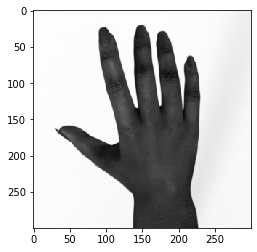

In [47]:
#DATADIR = './rock-paper-scissors-dataset/rock-paper-scissors/Rock-Paper-Scissors/train'
DATADIR = './rock-paper-scissors-dataset/Rock-Paper-Scissors/train'
CATEGORIES = ['paper','rock','scissors']
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_Array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_Array,cmap="gray")
        plt.show()
        break;
    break;

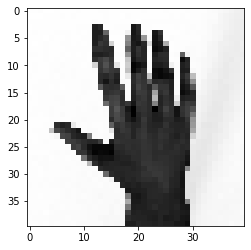

In [48]:
IMG_SIZE = 40
new_array = cv2.resize(img_Array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [49]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_Array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_Array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [50]:
print(len(training_data))

2520


In [51]:
import random
random.shuffle(training_data)

In [52]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
2
1
0
0
2
1
2


In [53]:
X = []
y = []


In [54]:
for features, label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [55]:
import pickle

In [56]:
pickle_out = open("x.pickel","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickel","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [57]:
pickle_in=open("x.pickel","rb")
X=pickle.load(pickle_in)
pickle_in.close()

pickle_in=open("y.pickel","rb")
y=pickle.load(pickle_in)
pickle_in.close()

## Convolutional neural network

In [58]:
X=X/255.0
y_=[]
for cat in y:
    if cat==0:
        y_.append([1,0,0])
    elif cat==1:
        y_.append([0,1,0])
    else:
        y_.append([0,0,1])
y_=np.array(y_).reshape((-1,3))

In [59]:
model = Sequential()

model.add( Conv2D(32,(3,3),input_shape=X.shape[1:]) )
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [61]:
model.fit(X,y_,batch_size=32,epochs=10,validation_split=0.2)

Train on 2016 samples, validate on 504 samples
Epoch 1/10
2016/2016 [==============================] - 4s 2ms/sample - loss: 0.1137 - acc: 0.9732 - val_loss: 0.1429 - val_acc: 0.9881
Epoch 2/10
2016/2016 [==============================] - 4s 2ms/sample - loss: 0.0527 - acc: 0.9911 - val_loss: 0.0914 - val_acc: 0.9960
Epoch 3/10
2016/2016 [==============================] - 4s 2ms/sample - loss: 0.0368 - acc: 0.9926 - val_loss: 0.0642 - val_acc: 0.9980
Epoch 4/10
2016/2016 [==============================] - 4s 2ms/sample - loss: 0.0286 - acc: 0.9945 - val_loss: 0.0495 - val_acc: 0.9980
Epoch 5/10
2016/2016 [==============================] - 4s 2ms/sample - loss: 0.0174 - acc: 0.9965 - val_loss: 0.0372 - val_acc: 0.9980
Epoch 6/10
2016/2016 [==============================] - 4s 2ms/sample - loss: 0.0156 - acc: 0.9960 - val_loss: 0.0409 - val_acc: 0.9980
Epoch 7/10
2016/2016 [==============================] - 4s 2ms/sample - loss: 0.0138 - acc: 0.9980 - val_loss: 0.0276 - val_acc: 1.0000
E

In [62]:
j=0
for i in model.predict(X):
    print(list(i).index(max(i)),y_[j])
    if j==30:
        break;
    j+=1

0 [1 0 0]
1 [0 1 0]
1 [0 1 0]
2 [0 0 1]
1 [0 1 0]
0 [1 0 0]
0 [1 0 0]
2 [0 0 1]
1 [0 1 0]
2 [0 0 1]
0 [1 0 0]
1 [0 1 0]
2 [0 0 1]
0 [1 0 0]
2 [0 0 1]
0 [1 0 0]
1 [0 1 0]
0 [1 0 0]
1 [0 1 0]
0 [1 0 0]
2 [0 0 1]
1 [0 1 0]
2 [0 0 1]
0 [1 0 0]
0 [1 0 0]
0 [1 0 0]
0 [1 0 0]
2 [0 0 1]
1 [0 1 0]
0 [1 0 0]
2 [0 0 1]


In [63]:
### Model evaluation

In [64]:
DATADIR = './rock-paper-scissors-dataset/Rock-Paper-Scissors/test'
testing_data = []
def create_testing_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_Array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_Array,(IMG_SIZE,IMG_SIZE))
                testing_data.append([new_array,class_num])
            except Exception as e:
                pass
create_testing_data()
X_test=[]
y_test=[]
for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)
X_test=np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_test=X_test/255.0
y_=[]
for cat in y_test:
    if cat==0:
        y_.append([1,0,0])
    elif cat==1:
        y_.append([0,1,0])
    else:
        y_.append([0,0,1])
y_=np.array(y_).reshape((-1,3))

In [65]:
model.evaluate(X_test,y_,verbose=2)

372/372 - 0s - loss: 0.3210 - acc: 0.8817


[0.3209544977834148, 0.8817204]

In [66]:
## saving the model

In [67]:
model.save('./hand tracking and classification using cnn/my_model.h5')